# One Sample T-Test - Lab

## Introduction
Just as you previously used the t-distribution to provide confidence intervals for estimating the population mean, you can also use similar methods to test whether two populations are different, statistically speaking. To do this, you can use a t-test.

## Objectives
You will be able to:

* Perform a one sample t-test and make conclusions about an experiment based on the results

### Exercise 1: 

Create a function in Python `one_sample_ttest(sample, popmean, alpha)` that will take in sample data (an array of observations), the population mean and the alpha value to calculate and print out the t-statistic, critical t-value, and p-value for the sample and identify if the results are significant or not. The function should also create a visualization using `seaborn` of the distribution to check for normality.

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

def one_sample_ttest(sample, popmean, alpha):

    # Visualize sample distribution for normality 
    sns.set(color_codes=True)
    sns.set(rc={'figure.figsize':(12,10)})
    sns.distplot(sample)
    plt.axvline(popmean, color = 'black') #vertical line
    
    # Population mean 
    
    # Sample mean (x̄) using NumPy mean()
    sample_mean = sample.mean()
    print(f'Population Mean: {popmean}')
    print(f'Sample Mean: {np.round(sample_mean, 2)}')
    
    # Sample Standard Deviation (sigma) using Numpy
    sample_std = np.std(sample)
    
    # Degrees of freedom
    df = len(sample) - 1
    
    #Calculate the critical t-value, using scipy, ppf: percent point function
    t_critical = np.abs(stats.t.ppf(alpha, df))
    print(f'T Critical: {np.round(t_critical, 2)}')
    
    #Calculate the t-value and p-value
    p_val = stats.ttest_1samp(a=sample, popmean=popmean)[1] / 2
    t_statistic = stats.ttest_1samp(a=sample, popmean=popmean)[0]
    print(f'P Value: {p_val}')
    
    if (p_val < alpha) & (t_statistic > 0):
        print('Reject Null Hypothesis')
    else:
        print('Fail to Reject Null Hypothesis')

    return None

/Users/carrie/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
sample = np.array([84.0, 92.4, 74.3, 79.4, 86.7, 75.3, 90.9, 86.1, 81.0, 85.1, 
      78.7, 73.5, 86.9, 87.4, 82.7, 81.9, 69.9, 77.2, 79.3, 83.3])

In [3]:
stats.ttest_1samp(sample, 85) 
# the staticstic is negative, because the sample mean < popmean
# when we do the one tail test on the high side, we want the test statistic number positive.
# otherwise, we will reject null hypothesis for the opposite result.
# i.e. Students after taking online course scored less than the class mean. 
# we need to add another condition then

Ttest_1sampResult(statistic=-2.416684220414179, pvalue=0.025889786970991913)

### Exercise 2:

Use the function created in Exercise 1 to answer the following analytical questions.

In a Python class, some of the students have taken online courses to improve their Python skills.
The scores of a random sample of 20 students who underwent the online-course on a Python test are as follows: 

     [84.0, 92.4, 74.3, 79.4, 86.7, 75.3, 90.9, 86.1, 81.0, 85.1, 
      78.7, 73.5, 86.9, 87.4, 82.7, 81.9, 69.9, 77.2, 79.3, 83.3]

The mean score of the class before the test is 65. The teacher thinks that the online training has really helped the students and now they should perform better than the class (population) mean. Use this to set your null and alternative hypotheses.

1. Test to see if the sample mean is significantly different from 65 at the .05 level. Report the t- and p-values.
2. The researcher realizes that she accidentally recorded the score that should have been 80.9 as 90.9. Are these corrected scores significantly different from 65 at the .05 level?

Bonus: What is the effect size of the first sample compared to the population? How can you interpret this effect size in relation to your significance test?


### Solution:

- **Null**: Students after taking online course scored equal to or less than the class mean.
- **Alternative**: Students after taking online course scored greater than the class mean.

Population Mean: 65
Sample Mean: 81.8
T Critical: 1.73
P Value: 5.026677797226412e-11
Reject Null Hypothesis


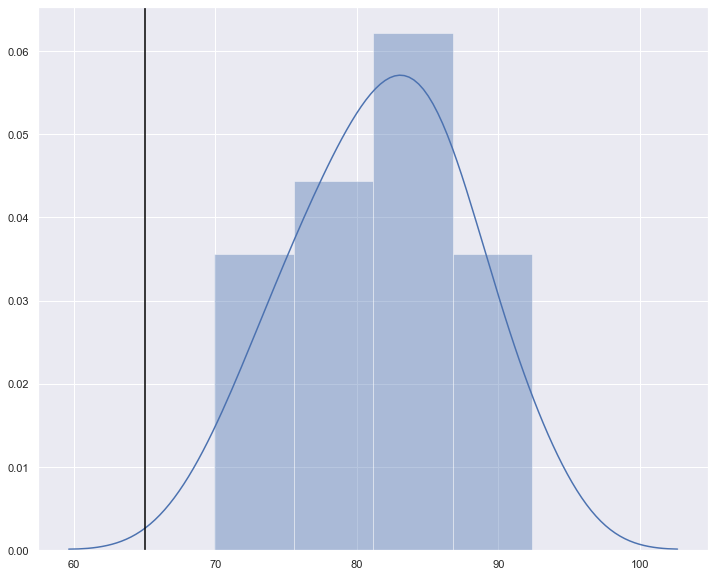

In [4]:
sample = np.array([84.0, 92.4, 74.3, 79.4, 86.7, 75.3, 90.9, 86.1, 81.0, 85.1, 
      78.7, 73.5, 86.9, 87.4, 82.7, 81.9, 69.9, 77.2, 79.3, 83.3])

popmean = 65
alpha = 0.05
one_sample_ttest(sample, popmean, alpha)

Population Mean: 65
Sample Mean: 81.3
T Critical: 1.73
P Value: 2.541680803341134e-11
Reject Null Hypothesis


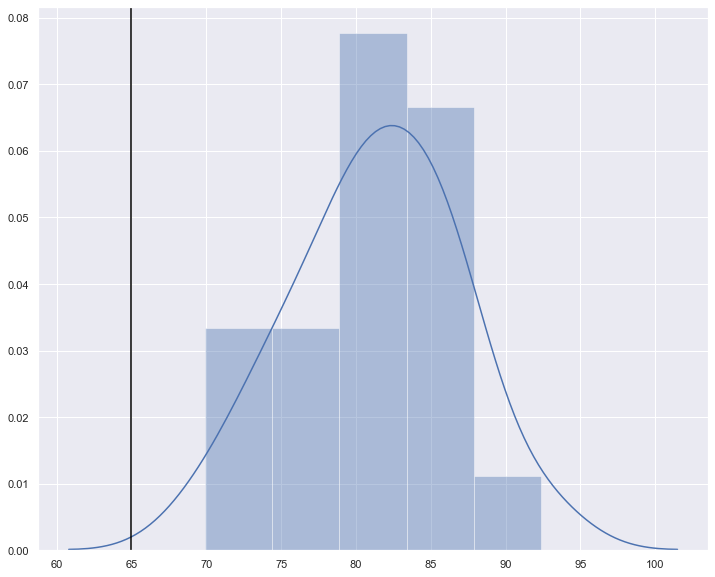

In [5]:
# With corrected values
sample1 = np.array([84.0, 92.4, 74.3, 79.4, 86.7, 75.3, 80.9, 86.1, 81.0, 85.1, 
      78.7, 73.5, 86.9, 87.4, 82.7, 81.9, 69.9, 77.2, 79.3, 83.3])

popmean = 65
alpha = 0.05
one_sample_ttest(sample1, popmean, alpha)

In [6]:
sample = np.array([84.0, 92.4, 74.3, 79.4, 86.7, 75.3, 90.9, 86.1, 81.0, 85.1, 
      78.7, 73.5, 86.9, 87.4, 82.7, 81.9, 69.9, 77.2, 79.3, 83.3])
popmean = 65

In [7]:
# effect size
(np.mean(sample) - popmean) / np.std(sample)

# the popmean < sample_mean, there's quite a large effect size

2.91073326578857

## Summary

In this lab, you saw a quick introduction to hypothesis testing using frequentist methods with t-values and p-values. You saw how a one sample t-test can be applied to contexts where the population mean is unknown and you have a limited amount of sample data. You looked at all the stages required for such hypothesis testing with a description of steps and also, how to perform these functions in Python. The lesson also briefly explains the comparison of using p-value for statistical significance vs. effect sizes. 